In [1]:
#002 Making sure we have access to the right GPU for mixed precision training
#Mixed Precision Training
!nvidia-smi

Sat Feb 24 11:39:58 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 537.58                 Driver Version: 537.58       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   44C    P0              18W /  80W |      0MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
from extras.helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir,compare_historys,make_confusion_matrix

In [3]:
#Use tensorflow datasets to download data
#pip uninstall tensorflow_datasets; pip install tensorflow_datasets==4.9.2
import tensorflow_datasets as tfds
dataset_list = tfds.list_builders()
print("food101" in dataset_list)

True


In [4]:
(train_data,test_data),ds_info = tfds.load(name="food101",
                                           split=["train","validation"],
                                           shuffle_files=True,
                                           as_supervised=True,
                                           with_info=True)

In [5]:
#005 Exploring and becoming one with the data (Food101 from TensorFlow Datasets)
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [6]:
ds_info.features["label"].names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

(512, 512, 3)
tf.Tensor(1, shape=(), dtype=int64)


(-0.5, 511.5, 511.5, -0.5)

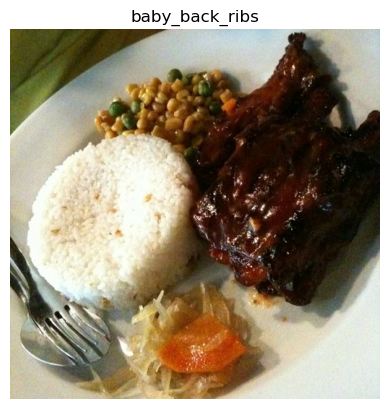

In [9]:
train_one_sample = train_data.take(1)
for image,label in train_one_sample:
    print(image.shape)
    print(label)

import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(ds_info.features["label"].names[label.numpy()])
plt.axis(False)

In [8]:
#006 Creating a preprocessing function to prepare our data for modelling

